In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import jaxopt
import jax.scipy as jscipy
import scipy
from functools import partial
import api
import matplotlib.pyplot as plt

from jax.config import config; config.update("jax_enable_x64", True)

In [2]:
N_omega = 401
omega = jnp.linspace(-30, 30, N_omega)
extended_omega = jnp.linspace(omega[0], omega[-1], 2*N_omega - 1)
delta_omega = np.abs(omega[1] - omega[0])
z = 1.#2*10**-3
delta_k = 1.j*np.diag(omega)
n = .5

In [3]:
# Initialize the pump 
beta = 0.1*(jax.random.uniform(key=jax.random.PRNGKey(np.random.randint(999)), shape=(2*N_omega - 1, )) - 1)

In [4]:
# Create the minimization solver
optimizer = jaxopt.ScipyMinimize(method="BFGS", fun=api.problem, maxiter=1, jit = False)

In [5]:
# Implement penalty method
import time
k = 0
pumps = []
for i in range(20):
    tic = time.time()
    results_n = []
    results_purity = []
    for j in range(20):
        beta, _ = optimizer.run(beta, omega, z, n, k)
        results = api.get_observables(beta, omega, z)
        results_n.append(results[0])
        results_purity.append(results[1])
    k = 3**i
    print("Observables: ", results)
    print("Penalty index: ", i)
    print("Time for a  loop: ", time.time() - tic)
    pumps.append(beta.copy())

Observables:  (Array(157.47965777, dtype=float64), Array(0.0071983, dtype=float64))
Penalty index:  0
Time for a  loop:  10.201732635498047
Observables:  (Array(0.57015627, dtype=float64), Array(0.18636257, dtype=float64))
Penalty index:  1
Time for a  loop:  8.240925312042236
Observables:  (Array(0.50904763, dtype=float64), Array(0.20205816, dtype=float64))
Penalty index:  2
Time for a  loop:  8.485187768936157
Observables:  (Array(0.50298461, dtype=float64), Array(0.20436511, dtype=float64))
Penalty index:  3
Time for a  loop:  8.462673902511597
Observables:  (Array(0.500968, dtype=float64), Array(0.2065873, dtype=float64))
Penalty index:  4
Time for a  loop:  8.46442174911499
Observables:  (Array(0.50033051, dtype=float64), Array(0.20710672, dtype=float64))
Penalty index:  5
Time for a  loop:  8.466439247131348
Observables:  (Array(0.50013224, dtype=float64), Array(0.20725686, dtype=float64))
Penalty index:  6
Time for a  loop:  8.515624761581421
Observables:  (Array(0.50005013, dty

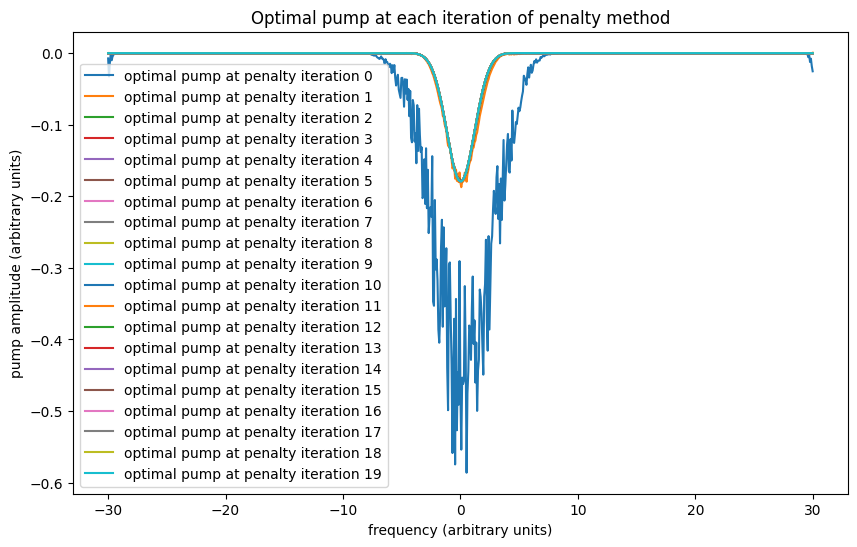

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Optimal pump at each iteration of penalty method")
plt.xlabel("frequency (arbitrary units)")
plt.ylabel("pump amplitude (arbitrary units)")
for i in range(len(pumps)):
    plt.plot(np.linspace(omega[0], omega[-1], 2*N_omega - 1), pumps[i], label = "optimal pump at penalty iteration "+str(i))
plt.legend()

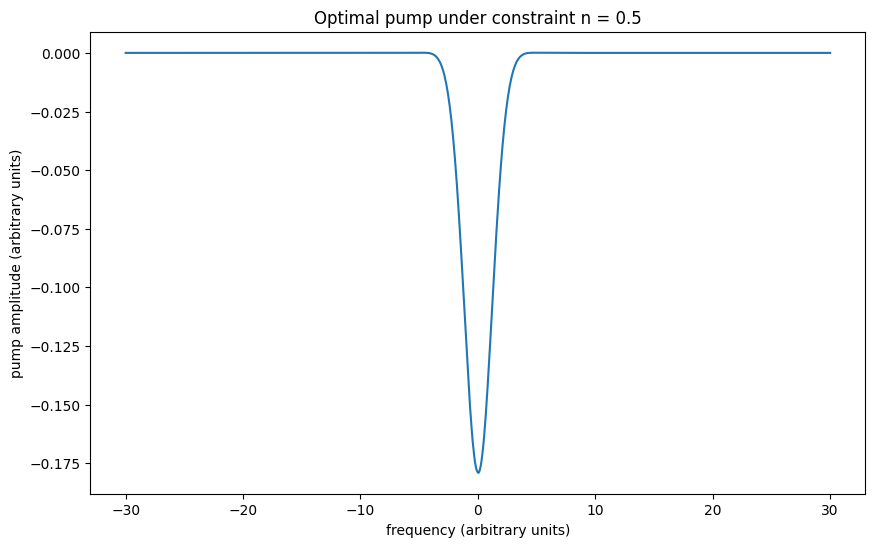

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Optimal pump under constraint n = " + str(n))
plt.xlabel("frequency (arbitrary units)")
plt.ylabel("pump amplitude (arbitrary units)")
plt.plot(np.linspace(omega[0], omega[-1], 2*N_omega - 1), beta)